## Algorithm to predict the size of the Yerba Mate grains

It is based in a photo of the grains disposed in a white paper. The algorithm can detect the contours and calculate the equivalent width and length of each grain. Then the distribution of the particle sizes is shown.

1. First the image is loaded and the cv2 library is used to process the image

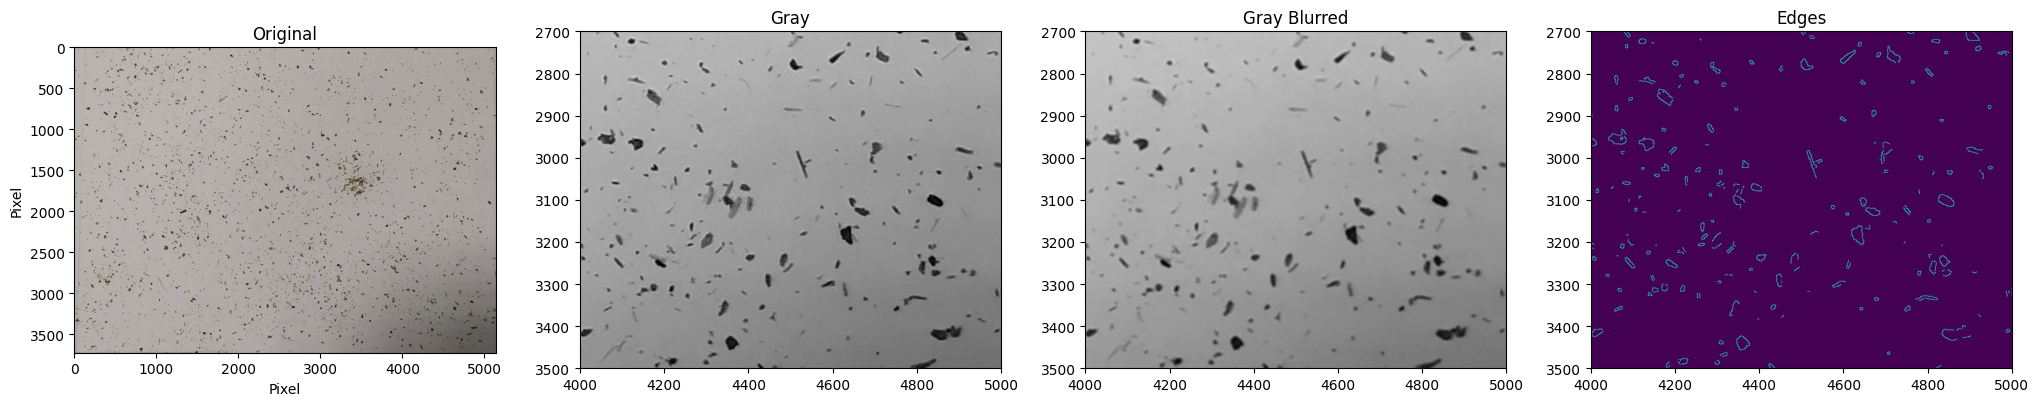

In [22]:
import cv2 as cv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

fname = 'YM2_extrafine_200x150.jpg'
img = cv.imread(fname) #YM_media3_2914x1758

#YM2_fine_150x100 --> 2684/150 = 17.89  ; 1768/100 = 17.68 resolution
#YM2_gruesa_200x150 --> 2454/200=12.27 ; 1826/150= 12.17
#YM2_extrafine_200x150 -->  5136/200 = 25.68 ; 3726/150 = 24.84

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# Apply Gaussian blur to reduce noise
gray_blurred = cv.GaussianBlur(gray, (7, 7), 5)
img_edges = cv.Canny(gray,150,200)
#cv2.Canny

fig, axx = plt.subplots(1, 4, figsize=(25,10))
axx[0].imshow(img_rgb)
axx[1].imshow(gray, cmap='gray')
axx[2].imshow(gray_blurred, cmap='gray')
axx[3].imshow(img_edges)
#fig.suptitle('Yerba Mate extrafine granules')
axx[0].set_xlabel('Pixel')
axx[0].set_ylabel('Pixel')
axx[0].set_title('Original')
#axx[0].set_xlim(4000, 5000)
#axx[0].set_ylim(2500, 3500)

axx[1].set_title('Gray')
axx[1].set_xlim(4000, 5000)
axx[1].set_ylim(3500, 2700)

axx[2].set_title('Gray Blurred')
axx[2].set_xlim(4000, 5000)
axx[2].set_ylim(3500, 2700)

axx[3].set_title('Edges')
axx[3].set_xlim(4000, 5000)
axx[3].set_ylim(3500, 2700)
plt.show()



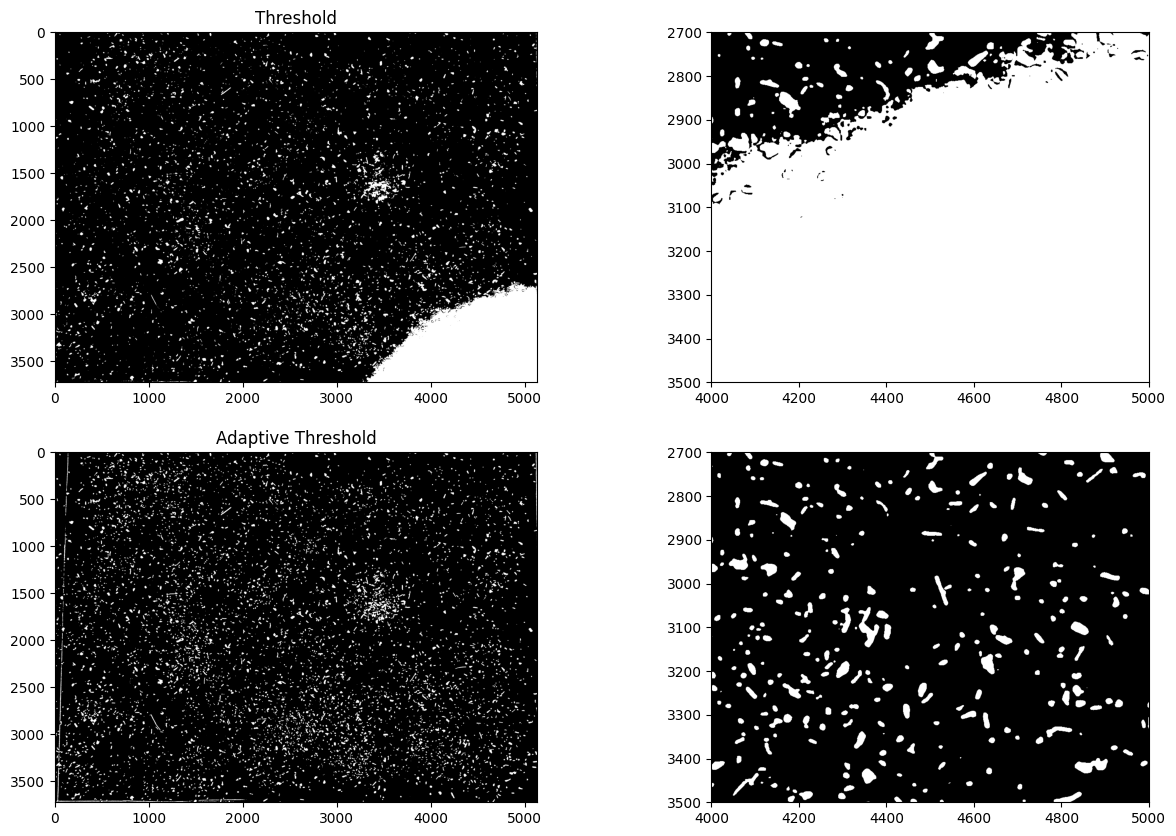

In [23]:
# Get the pixel resolution in pixels per millimeter (Enter valid values based on your image)
#pixel_resolution_x = float(input("Enter horizontal pixel resolution (pixels/mm): ")) #2234/100=22.34
#pixel_resolution_y = float(input("Enter vertical pixel resolution (pixels/mm): "))   #1358/60= 22.62

pixel_resolution_x = 25.6
pixel_resolution_y = 24.84

# Apply thresholding to segment the sticks from the background
thresh = cv.threshold(gray_blurred, 100, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
thresh2 = cv.adaptiveThreshold(gray_blurred, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 71,4)

fig, axx = plt.subplots(2, 2, figsize=(15,10))
axx[0][0].imshow(cv.cvtColor(thresh, cv.COLOR_BGR2RGB))
axx[0][0].set_title('Threshold')

axx[0][1].imshow(cv.cvtColor(thresh, cv.COLOR_BGR2RGB))
axx[0][1].set_xlim(4000, 5000)
axx[0][1].set_ylim(3500, 2700)

axx[1][0].imshow(cv.cvtColor(thresh2, cv.COLOR_BGR2RGB))
axx[1][0].set_title('Adaptive Threshold')

axx[1][1].imshow(cv.cvtColor(thresh2, cv.COLOR_BGR2RGB))
axx[1][1].set_xlim(4000, 5000)
axx[1][1].set_ylim(3500, 2700)

plt.show()


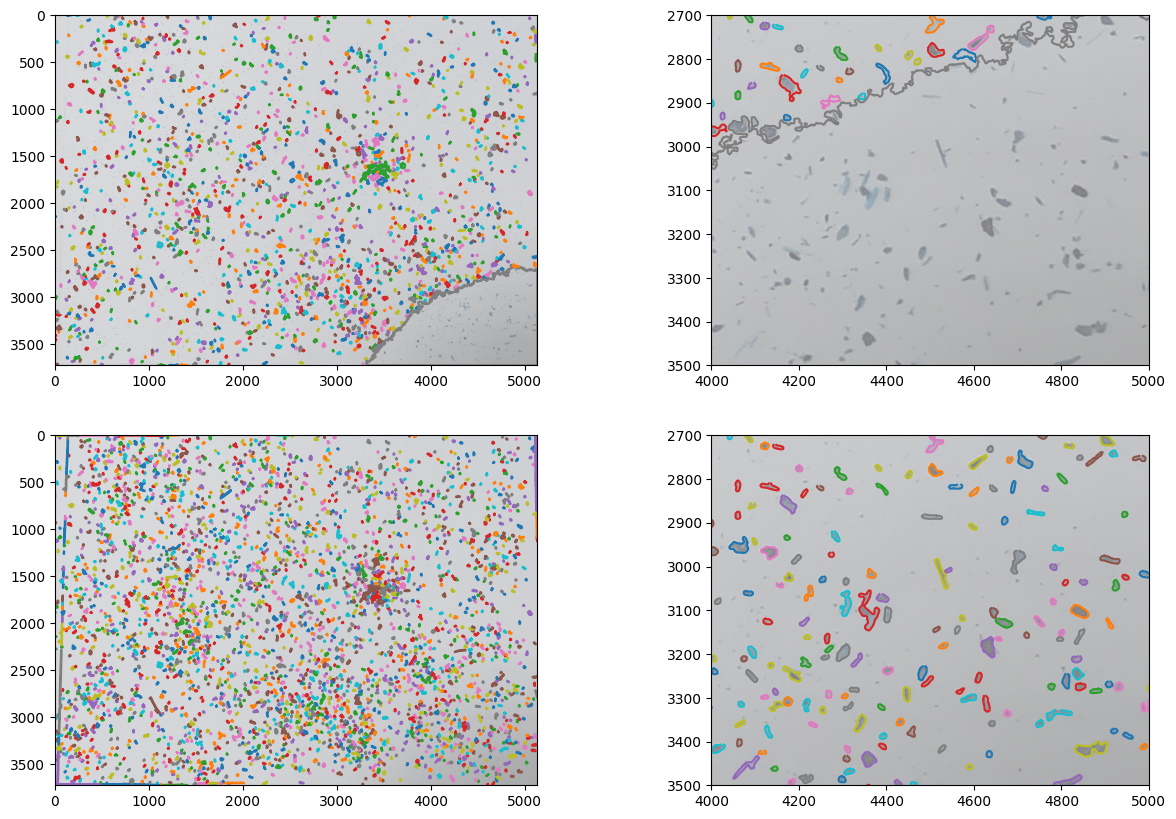

In [25]:
# Find contours of the sticks
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2 = cv.findContours(thresh2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

fig, axx = plt.subplots(2, 2, figsize=(15,10))
colors = ['r', 'g', 'b', 'y', 'm']
for i, contour in enumerate(contours):
    area = cv.contourArea(contour)
    if area > 100:  # Only draw valid contours
        x, y = contour[:, :, 0].ravel(), contour[:, :, 1].ravel()
        axx[0][0].plot(x, y)
        axx[0][1].plot(x, y) 
axx[0][0].imshow(img, cmap='viridis', alpha=0.5)  # Overlay original image
axx[0][1].imshow(img, cmap='viridis', alpha=0.5)  # Overlay original image
axx[0][1].set_xlim(4000, 5000)
axx[0][1].set_ylim(3500, 2700)

for i, contour in enumerate(contours2):
    area = cv.contourArea(contour)
    if area > 100:  # Only draw valid contours
        x, y = contour[:, :, 0].ravel(), contour[:, :, 1].ravel()
        axx[1][0].plot(x, y)
        axx[1][1].plot(x, y)
axx[1][0].imshow(img, cmap='viridis', alpha=0.5)  # Overlay original image
axx[1][1].imshow(img, cmap='viridis', alpha=0.5)  # Overlay original image
axx[1][1].set_xlim(4000, 5000)
axx[1][1].set_ylim(3500, 2700)

plt.show()

In [ ]:

# Initialize lists to store stick dimensions
stick_lengths = []
stick_widths = []

# Loop through each contour (stick)
for contour in contours:
    # Filter out small contours based on area (this threshold may need adjustment)
    area = cv.contourArea(contour)
    if area > 100:  # Minimum contour area to consider (pixels)
        # Calculate the bounding rectangle for the contour
        x, y, w, h = cv.boundingRect(contour)
        
        # Debugging output: bounding rectangle position and size in pixels
        print(f"Contour area: {area}, Width (px): {w}, Height (px): {h}")

        # Convert pixel dimensions to millimeters
        length = h / pixel_resolution_y  # Height in mm
        width = w / pixel_resolution_x    # Width in mm
        
        #Aca agregar que calcule el area de circunferencia equivalente de cada grano:
        
        # Append the stick dimensions to the lists
        stick_lengths.append(length)  # in mm
        stick_widths.append(width)    # in mm



### Some GIT commands

- cd ~/projects/my_notebooks      -->   Navigate to the notebook directory
- code my_notebook.ipynb           --> Open the notebook in VS Code


- git add my_notebook.ipynb    -->     # Stage the changes
- git commit -m "Updated analysis"  --> # Commit the changes
- git push origin main           -->    # Push changes to the main branch (if needed)

- In WLS:   The Windows drive letters (like C:) are mapped to /mnt/c in WSL. 
- ls /mnt/c/  --> to access the disk
- cd /mnt/c/Users/YourUsername/Pictures --> or navigate to path 

\
- In PowerShell:\
$path = path \
$path -replace  '\\\\', '/' \
asdfs